## 概要
将桌面清空，从相机端/文件读入数据，对桌面进行拟合。 
```
@作者: 阿凯爱玩机器人
@QQ: 244561792
@微信: xingshunkai
@邮箱: xingshunkai@qq.com
@网址: deepsenserobot.com
@B站: "阿凯爱玩机器人"
```

## 导入依赖

In [1]:
import numpy as np
import cv2
from matplotlib import pyplot as plt
import open3d as o3d

# 阿凯机器人工具箱
from kyle_robot_toolbox.camera import Gemini335
from kyle_robot_toolbox.open3d import *

pybullet build time: Jun  3 2022 02:05:55


In [2]:
%matplotlib inline

## 配置参数

In [3]:
load_from_file = True

## 创建相机对象

In [4]:
# 创建相机对象
camera = Gemini335()

## 拍摄数据/载入数据

清空桌面，让桌面称为画面的主体

In [5]:
img_name = "desktop" # 图像ID
    
if load_from_file:
    # - 保存彩图
    color_image = cv2.imread(f"./data/example/destop_panel/{img_name}.png")
    # - 保存深度图 二进制格式
    depth_image = np.load(f"./data/example/destop_panel/{img_name}.npy")
else:
    # 获取彩图与深度图
    color_image, depth_image = camera.read()
    # 保存图像
    # - 保存彩图
    cv2.imwrite(f"./data/example/destop_panel/{img_name}.png", color_image)
    # - 保存深度图 二进制格式
    np.save(f"./data/example/destop_panel/{img_name}.npy", depth_image)


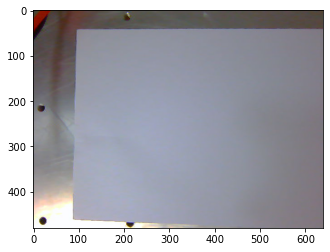

In [6]:
# 显示彩图
plt.imshow(color_image[:,:, ::-1])

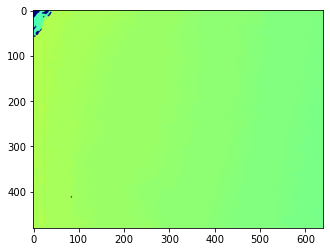

In [7]:
# 显示深度图
# 将深度图转换为画布
canvas_depth = camera.depth_img2canvas(depth_image)
plt.imshow(canvas_depth[:,:, ::-1])

In [8]:
cv2.imwrite(f"./data/example/destop_panel/depth_canvas.png", canvas_depth)

True

In [11]:
# 转换为点云
pcd = camera.get_pcd(color_image, depth_image, \
                     camera="rgb_camera")

# 点云可视化
o3d.visualization.draw_geometries([pcd], window_name="工作台原始点云")

## 工作台平面拟合

In [12]:
# 距离阈值 单位m
# 距离平面多少的点被认为是在这个平面上的点
distance_threshold = 0.005
# 平面拟合
plane_model, inliers = pcd.segment_plane(distance_threshold=distance_threshold,
                                         ransac_n=3,
                                         num_iterations=500)
# 打印拟合平面的表达式
[a, b, c, d] = plane_model
print(f"拟合桌面平面的表达式: {a:.2f}x + {b:.2f}y + {c:.2f}z + {d:.2f} = 0")

# 工作平面上的点云
ws_panel_cloud = pcd.select_by_index(inliers)
# ws_panel_cloud.paint_uniform_color([1.0, 0, 0])

draw_geometry([ws_panel_cloud], window_name="工作平面上的点云")

# 保存平面拟合的结果
# 保存平面信息
panel_model = np.float32([a, b, c, d])

np.savetxt("data/example/destop_panel/desktop_panel_model.txt", panel_model, delimiter=",", fmt="%.4f")

拟合桌面平面的表达式: 0.05x + 0.01y + 1.00z + -0.26 = 0
